In [35]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, beta, uniform

In [48]:
# cilova hustota (gaussovska smes)
def f(x):
    return (0.3 * norm.pdf(x, loc=0, scale=0.5) +
            0.7 * norm.pdf(x, loc=10, scale=0.5)) 

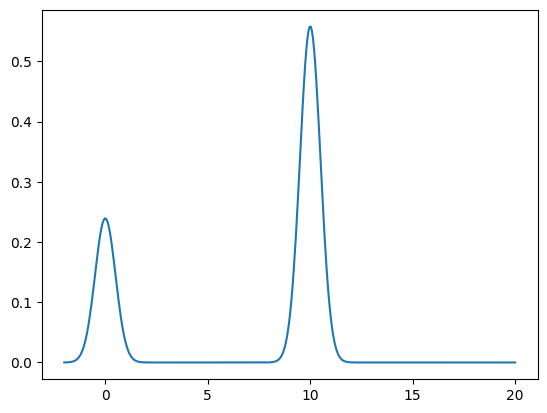

In [50]:
xs = np.linspace(-2, 20, 400)
plt.plot(xs, f(xs))

In [63]:
N = 20000 # pocet vzorku
x0 = 0    # 
samples = np.array([x0])    # generovane vzorky

In [64]:
# Metropolis-Hastings s cyklickymi jadry

q1 = norm(0, 0.1)  # navrhove rozdeleni 1
q2 = norm(0, 10)    # navrhove rozdeleni 2

for n in range(N):
    if n % 2 == 0:
        xprop = samples[-1]+q1.rvs()
    else:
        xprop = samples[-1]+q2.rvs()
    A = np.min([f(xprop)/f(samples[-1]), 1])
    U = uniform.rvs()
    xnew = xprop if U<A else samples[-1]
    #print (A, xnew)
    samples = np.append(samples, xnew)

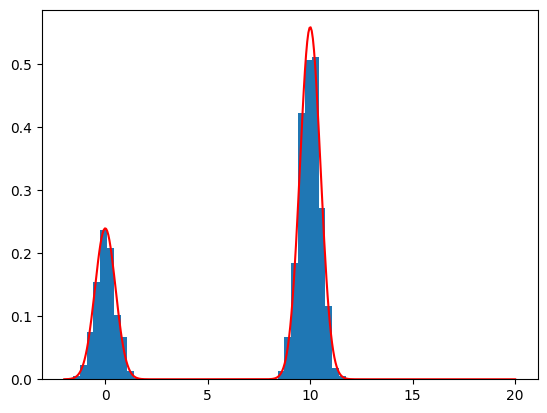

In [65]:
# skutecna hustota vs. generovane vzorky
plt.hist(samples, bins=40, density=True)
plt.plot(xs, f(xs), 'r')

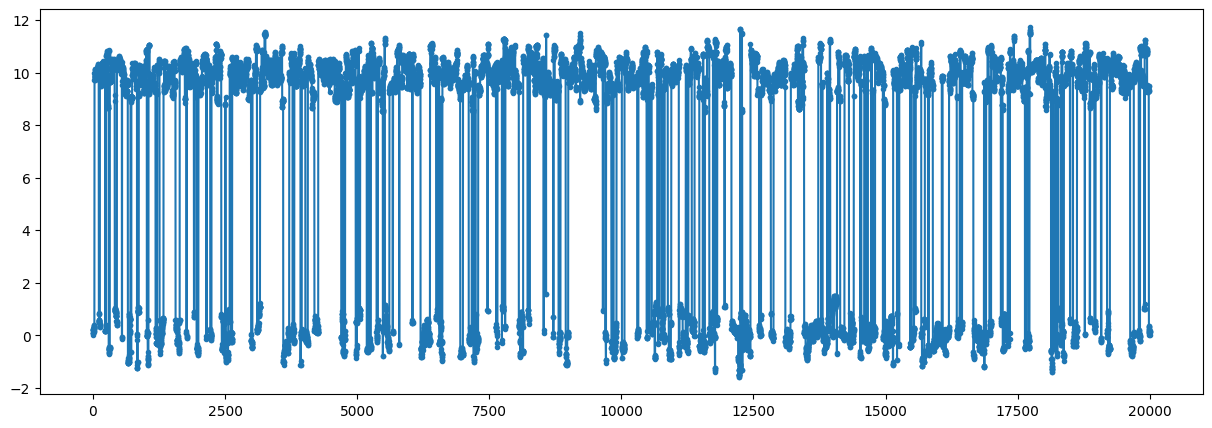

In [66]:
# trajektorie MCMC
plt.figure(figsize=(15, 5))
plt.plot(samples[:], '.-')

In [67]:
%load_ext watermark
%watermark -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
numpy     : 1.24.2
matplotlib: 3.7.5

